Once you reject a null hypothesis means you accept alternative hypotheis it is need not be that all means not equal some time any pair may be equal some other pair may not be equal. So whenever you reject null hypothesis, you have to ask which 2 means are equal? For that purpose there is one more statistical analysis ie, Post Hoc Analysis

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

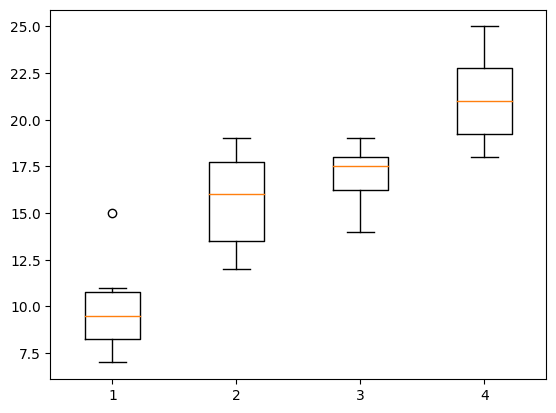

In [2]:
# Lec-25 5:00 or ScreenShot(991)
fivepercent = [7,8,15,11,9,10]
tenpercent = [12,17,13,18,19,15]
fifteenpercent = [14,18,19,17,16,18]
twentypercent = [19,25,22,23,18,20]

box_plot_data = [fivepercent, tenpercent, fifteenpercent, twentypercent]
plt.boxplot(box_plot_data)
plt.show()
# box-whisker plot

# Means are not equal. They appears that whenever the 
# percentage of hardwood is increasing so the tensile 
# strength is increasing bcoz there seems to be there
# is an increasing strength.


In [3]:
# stats from scipy
1-scipy.stats.f.cdf(19.6,3,20)
#                  (value at which you calc cdf, dfn, dfd)
# alpha = 5% and p-value < alpha so reject null hypotheis. Now there is the 
# influence of this hardwood on the tensile strength

3.599599239012541e-06

In [4]:
scipy.stats.f.ppf(1-0.01, dfn=3, dfd=20)
# Gives f-value for (probability, numerated degrees of freedom, denominator df)
# Our calculated f-value is 19.6 and computed here (op) is 4.93. Far away, 
# we got to reject null hypothesis

4.938193382310539

In [5]:
scipy.stats.f_oneway(fivepercent, tenpercent, fifteenpercent, twentypercent)
# get f-value, p-value

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

In [6]:
df = pd.read_excel('concentration.xlsx')
df

,concentration5,concentration10,concentration15,concentration20
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [7]:
data_r1 = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['concentration5','concentration10','concentration15','concentration20'])
data_r1.columns = ['index','treatments','value']

In [8]:
model = ols('value ~ C(treatments)', data = data_r1).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           3.59e-06
Time:                        13:39:25   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           15.6667      1.041     15.042      0.000      13.494      17.839
C(treatments)[T.concentration15]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(treatments)[T.concentration20]     5.5000      1.473      3.734      0.001       2.428       8.572
C(treatments)[T.concentration5]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


LSD

In [11]:
# import math
t = -1*scipy.stats.t.ppf(0.025,20)
n=6
MSE=6.508333
lsd = t*math.sqrt(2*MSE/n)
lsd

3.072422588325206

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data_r1['value'], data_r1['treatments'])
mcresult = mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
concentration10,concentration15,1.3333,0.8022,-2.7892,5.4559,False
concentration10,concentration20,5.5,0.0066,1.3774,9.6226,True
concentration10,concentration5,-5.6667,0.0051,-9.7892,-1.5441,True
concentration15,concentration20,4.1667,0.047,0.0441,8.2892,True
concentration15,concentration5,-7.0,0.0007,-11.1226,-2.8774,True
concentration20,concentration5,-11.1667,0.0,-15.2892,-7.0441,True


In [13]:
scipy.stats.f.ppf(1-0.05,dfn=4,dfd=20)
# alpha = .05, F(0.05,4,20)=2.87
# Reject Ho

2.8660814020156584

In [14]:
df3 = pd.read_excel('cotwt.xlsx')
df3

,cotwt.15,cotwt.20,cotwt.25,cotwt.30,cotwt.35
0,7,12,14,19,7
1,7,17,18,25,10
2,15,18,18,22,11
3,11,25,19,19,15
4,9,10,19,23,11


In [15]:
data1 = pd.melt(df3.reset_index(), id_vars=['index'], value_vars=['cotwt.15','cotwt.20','cotwt.25','cotwt.30','cotwt.35'])
data1.columns = ['id','treatments','value']

In [16]:
mc = MultiComparison(data1['value'], data1['treatments'])
mcresults = mc.tukeyhsd(0.05)
mcresults.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
cotwt.15,cotwt.20,6.6,0.0605,-0.2132,13.4132,False
cotwt.15,cotwt.25,7.8,0.02,0.9868,14.6132,True
cotwt.15,cotwt.30,11.8,0.0004,4.9868,18.6132,True
cotwt.15,cotwt.35,1.0,0.9917,-5.8132,7.8132,False
cotwt.20,cotwt.25,1.2,0.9835,-5.6132,8.0132,False
cotwt.20,cotwt.30,5.2,0.1911,-1.6132,12.0132,False
cotwt.20,cotwt.35,-5.6,0.1403,-12.4132,1.2132,False
cotwt.25,cotwt.30,4.0,0.4243,-2.8132,10.8132,False
cotwt.25,cotwt.35,-6.8,0.0506,-13.6132,0.0132,False
cotwt.30,cotwt.35,-10.8,0.0011,-17.6132,-3.9868,True
